<b>Name : Dilshan J.V.A.P<br>
Index number : 190144D<br>
Assignment 1

Github: https://github.com/pramodj196/EN2550-Fundamentals-of-Image-Processing-and-Machine-Vision/tree/main/Assignment%201

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Q1)

(-0.5, 719.5, 809.5, -0.5)

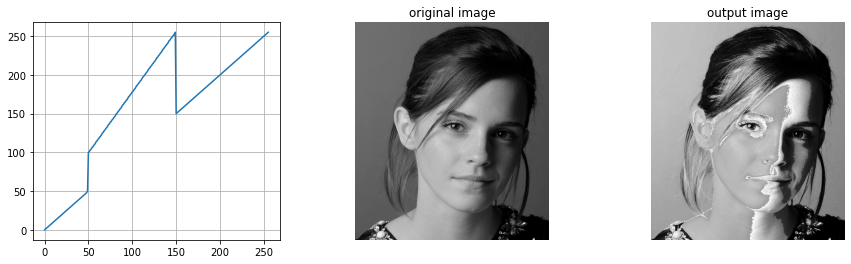

In [7]:
im=cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
t1= np.linspace (0,50,50)
t2= np.linspace (100,255,100)
t3= np.linspace (150,255,106)
t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)

assert len(t) ==256
g= cv.LUT(im,t)

fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(t)
ax[0].grid()
ax[1].imshow(im,'gray')
ax[1].set_title(r'original image')
ax[1].axis('off')
ax[2].imshow(g,'gray')
ax[2].set_title(r'output image')
ax[2].axis('off')

<b>In this question the intensity (input intensity) of each pixel is mapped to the output intensity of the intensity curve shown in the figure. For pixels with intensities in the 0-50 and 150-255 ranges, there is no difference in the output intensity. For pixels with the intensity in the range of 50 -150 (It is like the gray range) the value of the output increases according to the graph.</b>

# Q2)

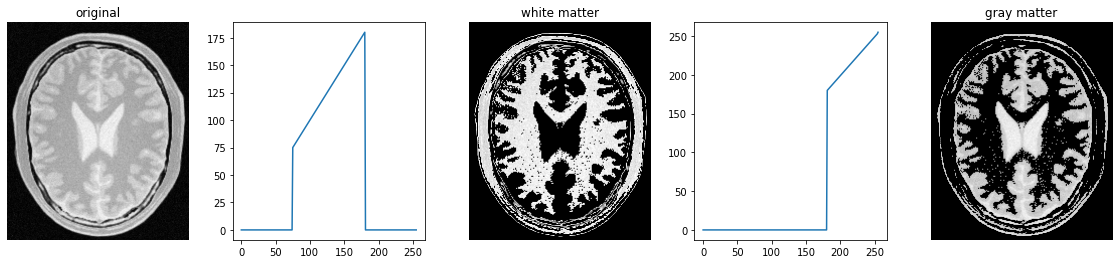

In [12]:
im2=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

#(a) white matter
t1= np.linspace (0,0,75)
t2= np.linspace (75,180,106)
t3= np.linspace (0,0,75)
white_t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)
assert len(white_t) ==256
g1= cv.LUT(im2,white_t)

#(b) gray matter
t4=np.linspace (0,0,75)
t5= np.linspace (0,0,106)
t6= np.linspace (180,255,75)
gray_t= np.concatenate((t4,t5,t6), axis =0).astype(np.uint8)
assert len(gray_t) ==256
g2= cv.LUT(im2,gray_t)

fig,ax = plt.subplots(1,5,figsize=(20,4))
ax[0].imshow(im2,'gray')
ax[0].set_title(r'original')
ax[1].plot(white_t)
ax[2].imshow(g1,'gray')
ax[2].set_title(r'white matter')
ax[3].plot(gray_t)
ax[4].imshow(g2,'gray')
ax[4].set_title(r'gray matter')

for  i in range(0,5,2):
    ax[i].axis('off')

<b>a) Here to accuentuate white matter the gray color range(75-180) of the orginal image is kept unchanged and pixels with other intensity values are made balck.

b) To accuentuate the gray matter the pixels having intensity of whites(180-255) is kept unchanged and pixels having other intensities are set black.

# Q3)

Text(0.5, 1.0, 'Histogram of L plane of orginal image')

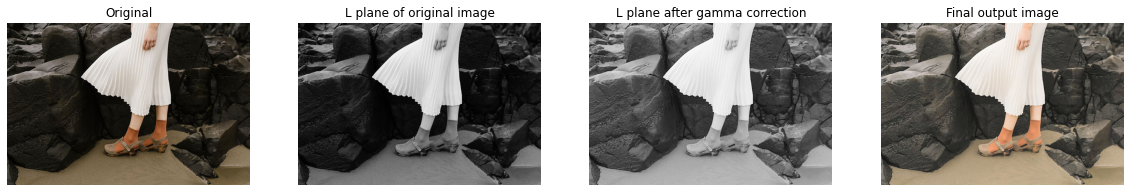

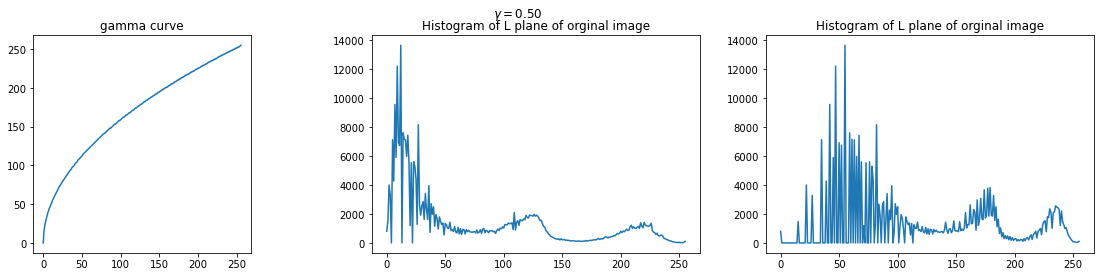

In [19]:
im3 = cv.imread(r'highlights_and_shadows.jpg')
assert im3 is not None

im3_Lab = cv.cvtColor(im3, cv.COLOR_BGR2Lab)
L,a,b = cv.split(im3_Lab)
hist_org = cv.calcHist([L], [0], None, [256], [0,256])

gamma = 0.5
lt = np.array([((i/255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
L2 = cv.LUT(L, lt)
im3_Lab[:,:,0] = L2
hist = cv.calcHist([L2], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,4,figsize = (20,4))
ax[0].imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(L, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].set_title('L plane of original image')
ax[2].imshow(cv.cvtColor(L2, cv.COLOR_BGR2RGB))
ax[2].set_title('L plane after gamma correction')
ax[3].imshow(cv.cvtColor(im3_Lab, cv.COLOR_Lab2RGB))
ax[3].set_title('Final output image')
for  i in range(4):
    ax[i].axis('off')

fig, ax = plt.subplots(1,3,figsize = (20,4))
fig.suptitle('$ \gamma = %.2f$'%gamma)
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[0].set_title('gamma curve')
ax[1].plot(hist_org)
ax[1].set_title('Histogram of L plane of orginal image')
ax[2].plot(hist)
ax[2].set_title('Histogram of L plane of orginal image')

<b>The original image is converted to the LAB color format and applied the gamma correction to the L plane. The final image is the modified L plane
combined with other 2 planes. The pictures and graphs related to the process are shown above. Looking at the graphs we can see that the narrow range of dark pixels are mapped to a wider range of dark pixels. The gamma corrected image is more brighter than the original image. </b>

# Q4)

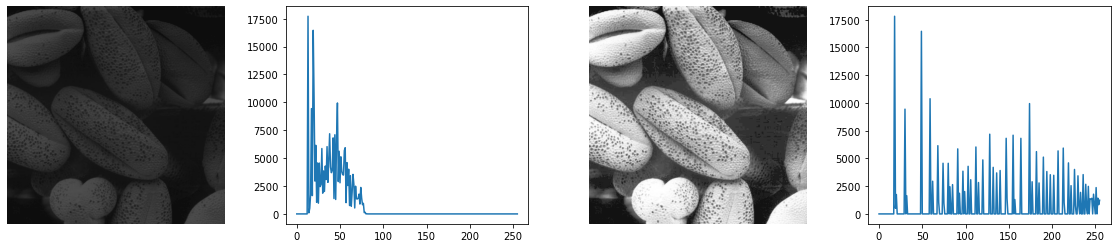

In [4]:
im4 = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert im4 is not None

def grayImgEqualize(img):
    M,N = img.shape
    L = 256
    hist = cv.calcHist([img], [0], None, [256], [0,256]) 
    
    lt = []
    sum = 0
    for k in hist:
        sum+=k[0]
        lt.append(round((sum*(L-1))/(M*N)))
    return np.array(lt)

hist_org = cv.calcHist([im4], [0], None, [256], [0,256])

lt =grayImgEqualize(im4)
im_equalized = cv.LUT(im4, lt)
hist = cv.calcHist([im_equalized.astype(np.uint8)], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,4,figsize = (20,4))
ax[0].imshow(cv.cvtColor(im4, cv.COLOR_GRAY2RGB))
ax[0].axis('off')
ax[1].plot(hist_org)
ax[2].imshow(cv.cvtColor(im_equalized.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[2].axis('off')
ax[3].plot(hist)


<b>The color intensity histogram in the gray image is shown in the first histogram. For histogram equalization I have defined a function 'grayImgEqualize (img)'. In here the histogram equalization is done by getting the CDF and doing the relavent operation (coded in the function). The equalized histogram is shown in the 2nd graph. The change in the figure due to this can also be seen by the two corresponding figures. The results of histogram equalization by this function is similar to the inbuilt function. The histograms are also identical. Histogram Equalization adjusts the contrast of an image by using its histogram. To enhance the image's contrast, it spreads out the most frequent pixel intensity values or stretches out the intensity range of the image.</b>

# Q5)

Nearest neightbor zooming function : zoomNN_color(src,scalar)<br>
Bipolar interpolation zooming function: zoomBI_color(src,scalar)

(<matplotlib.image.AxesImage at 0x14f98fa7ca0>,
 None,
 Text(0.5, 1.0, 'zoomed - bilinear interpolation'))

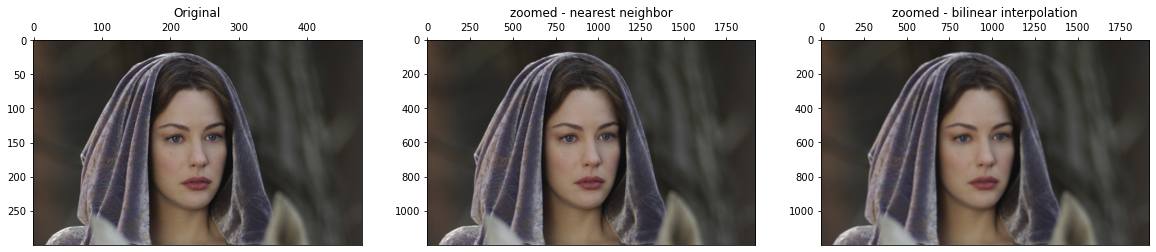

In [9]:
img = cv.imread(r'.\a1q5images\im02small.png')
assert img is not None
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
def zoomNN_singlePlane(src,scalar):
    h0 = src.shape[0]
    w0 = src.shape[1]
    h1 = int(h0 * scalar)
    w1 = int(w0 * scalar)
    zoomedImg = np.zeros((h1,w1),dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            y0 = y // scalar
            if (y%scalar >= 0.5):
                y0 += 1
            y0 = int(min(y0,h0-1))
            x0 = x // scalar
            if (x%scalar >= 0.5):
                x0 += 1
            x0 = int(min(x0,w0-1))
            zoomedImg[y,x] = src[y0,x0]
    return zoomedImg
def zoomBI_singlePlane(src,scalar):
    h0 = src.shape[0]
    w0 = src.shape[1]
    h1 = int(h0 * scalar)
    w1 = int(w0 * scalar)
    zoomedImg = np.zeros((h1,w1),dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            y0 = (y / scalar)
            x0 = (x / scalar)
            y_frac = y0 %1
            x_frac = x0 %1
            y00 = int(y0)
            x00 = int(x0)
            y01 = min(h0-1,y00+1)
            x01 = min(w0-1,x00+1)
            intensity_x_0 = src[y00,x00]*y_frac + src[y01,x00]*(1-y_frac)
            intensity_x_1 = src[y00,x01]*y_frac + src[y01,x01]*(1-y_frac)
            intensity = intensity_x_0 * x_frac + intensity_x_1 * (1-x_frac)
            intensity = int(intensity)
            zoomedImg[y,x] = intensity
    return zoomedImg
def zoomNN_color(src,scalar):
    p1,p2,p3 = cv.split(src);
    return cv.merge((zoomNN_singlePlane(p1,scalar),zoomNN_singlePlane(p2,scalar),zoomNN_singlePlane(p3,scalar)))
def zoomBI_color(src,scalar):
    p1,p2,p3 = cv.split(src);
    return cv.merge((zoomBI_singlePlane(p1,scalar),zoomBI_singlePlane(p2,scalar),zoomBI_singlePlane(p3,scalar)))
zoomedImgNN = zoomNN_color(img,4)
zoomedImgBI = zoomBI_color(img,4)
#visualize the result
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0),ax[0].xaxis.tick_top(),ax[0].set_title("Original")
ax[1].imshow(zoomedImgNN,vmax=255,vmin=0),ax[1].xaxis.tick_top(),ax[1].set_title("zoomed - nearest neighbor")
ax[2].imshow(zoomedImgBI,vmax=255,vmin=0),ax[2].xaxis.tick_top(),ax[2].set_title("zoomed - bilinear interpolation")

In [10]:
smallImages = ["im01small.png","im02small.png","im03small.png"];
zoomedImages = ["im01.png","im02.png","im03.png"];
print("Nearest neighbor")
for i in range(2):
    imgS = cv.imread("./a1q5images/"+smallImages[i] ,cv.IMREAD_COLOR)
    imgZ = cv.imread("./a1q5images/"+zoomedImages[i] ,cv.IMREAD_COLOR)
    zoomed = zoomNN_color(imgS,4)
    SSD = np.sum((zoomed - imgZ)**2)/(imgZ.shape[0]*imgZ.shape[1]*imgZ.shape[2])
    print("image:", i," --> Normalized sum of error squared : ",SSD)
    
print("Bilinear interpolation")
for i in range(2):
    imgS = cv.imread("./a1q5images/"+smallImages[i] ,cv.IMREAD_COLOR)
    imgZ = cv.imread("./a1q5images/"+zoomedImages[i] ,cv.IMREAD_COLOR)
    zoomed = zoomBI_color(imgS,4)
    SSD = np.sum((zoomed - imgZ)**2)/(imgZ.shape[0]*imgZ.shape[1]*imgZ.shape[2])
    print("image:", i," --> Normalized sum of error squared : ",SSD)

Nearest neighbor
image: 0  --> Normalized sum of error squared :  52.55124839248971
image: 1  --> Normalized sum of error squared :  23.602486545138888
Bilinear interpolation
image: 0  --> Normalized sum of error squared :  50.66079282407407
image: 1  --> Normalized sum of error squared :  22.207302806712963



<b>You can notice that, bilinear interpolation method gives more smooth output. And the normalized sum of error squared is also low in bilinear interpolation method<br>
<ul>
  <li>Nearest neighbour interpolation algorithm is the most
simple and fast algorithm. It has the advantage of fast speed,
but it can carry a significant distortion. </li>
  <li>Bilinear interpolation method is more complex than the
nearest neighbour method, and so it has larger calculation.
This method has a low pass filtering properties, so that the
high frequency component is faded and the image contour
has some degree of fuzzy.</li>
<li>As the results of bilinear interpolation algorithm is continuous, so the visual effect is
better than the nearest point interpolation algorithm, but the
operation speed is slightly slower. </li>
<li>
Therefore, if one pays more attention to speed, it is better to use the nearest neighbor method, but if one pays more attention to good visual effect,
bilinear interpolation is more appropriate.</li>
</ul>


# Q6)

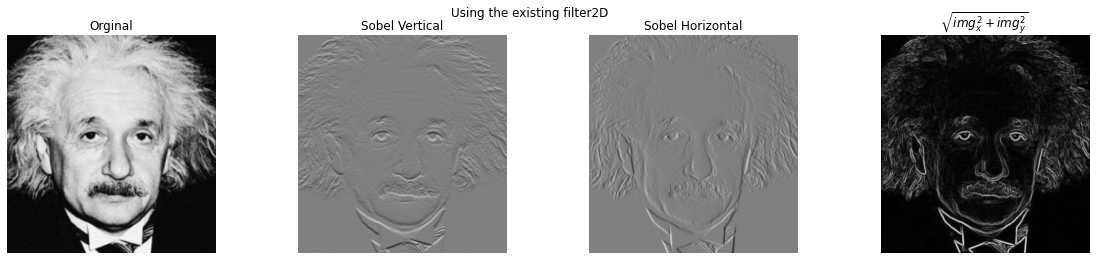

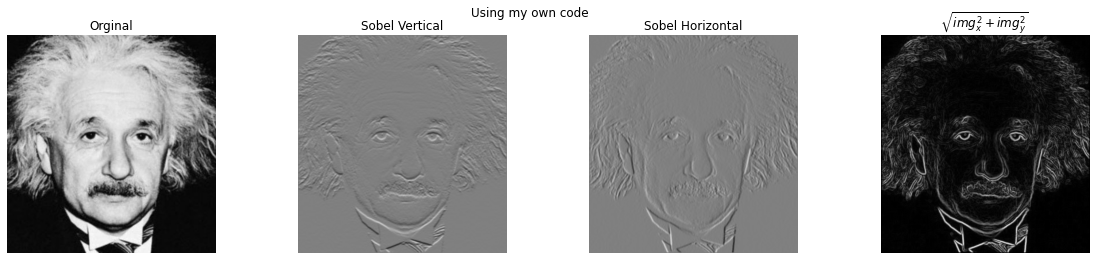

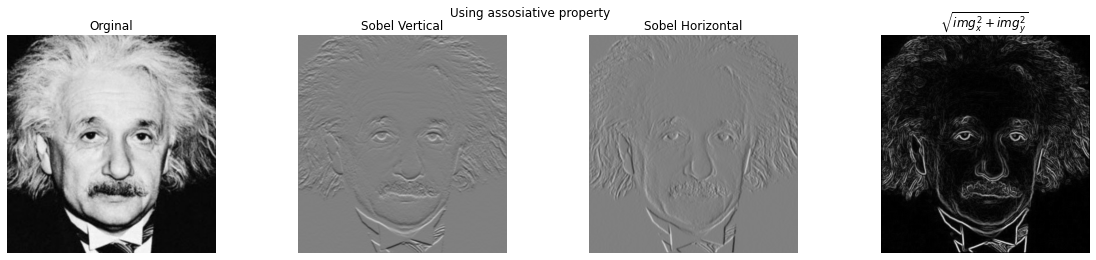

In [7]:
img0 = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img0 is not None

xDir =  np.array([ ( -1 , -2 , -1 ) , ( 0 , 0 , 0 ) , ( 1 , 2 , 1 ) ] , dtype = np.float32 )
yDir =  np.array([ ( -1 , 0 , 1 ) , ( -2 , 0 , 2 ) , ( -1 , 0 , 1 ) ] , dtype = np.float32 )

##(a)Using the existing filter2D
img1 = cv.filter2D(img0 ,-1 ,xDir)
img2 = cv.filter2D(img0 ,-1 ,yDir)
img3= np.sqrt(img1**2 + img2**2)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using the existing filter2D')
ax[0].set_title('Orginal')
ax[0].imshow(img0, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img1, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img3, cmap = 'gray')

for  i in range(4):
    ax[i].axis('off')

##(b)Using my own code
def my_func(img,kernel):
    M,N = img.shape
    imgNew=np.zeros((M,N))
    ksizex,ksizey = kernel.shape
    for i in range(M):
        for j in range(N):
            if (i<np.floor(ksizex/2) or j<np.floor(ksizey/2) or j> N - np.floor(ksizey/2) -1 or i> M - np.floor(ksizex/2)-1):
                imgNew[i][j]=0
            else:
                imgNew[i][j] = sum(sum(kernel*img[i-int(np.floor(ksizex/2)):i+int(np.floor(ksizex/2))+1 , j-int(np.floor(ksizey/2)):j+int(np.floor(ksizey/2))+1]))
    return imgNew        

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using my own code')
ax[0].set_title('Orginal')
ax[0].imshow(img0, cmap = 'gray', vmin =0 , vmax = 255)

img_sobel_vertical=my_func(img0,xDir)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img_sobel_vertical, cmap = 'gray',vmin =-1020, vmax=1020)
img_sobel_horizontal=my_func(img0,yDir)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img_sobel_horizontal, cmap = 'gray',vmin =-1020, vmax=1020)
img2= np.sqrt(img_sobel_vertical**2 + img_sobel_horizontal**2)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img2, cmap = 'gray')

for i in range(4):
    ax[i].axis('off')

##(C)associative property
A = np.array([[1,2,1]])
B = np.array([[-1],[0],[1]])
img1 =my_func(my_func(img0, A),B)
img2 = my_func(my_func(img0, B.T),A.T)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using assosiative property')
ax[0].set_title('Orginal')
ax[0].imshow(img0, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img1, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(np.sqrt(img1**2 + img2**2), cmap = 'gray')
for  i in range(4):
    ax[i].axis('off')


<b>a) The diagrams in the first row show the results of the sobel filtering the image using existing filter2D.

b) The second row shows how this is done by a defined function 'my_func' which take the image and the kernal as the parameters. It convolve the image with the respective kernal and return the output array. It has given very similar results to the using of filter2D as the operations are similar.

c) Due to the assosiative property of convolution when the sobel kernal is expressed as a matrix multiplication components and the image is convoluted by each
compnent in order the same final result can be obtained as convoluting the whole kernal at once. This is verified by the results in the 3rd row.


# Q7)

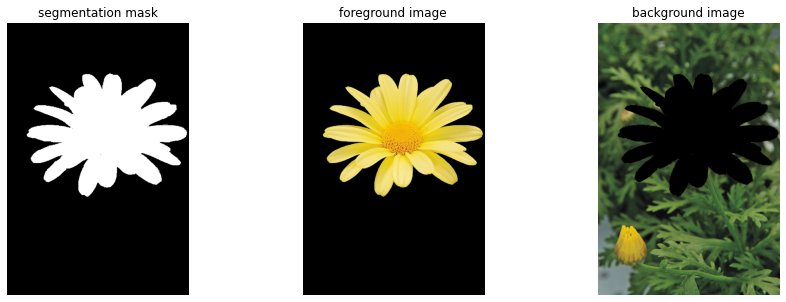

In [23]:
#(a)
image = cv.imread(r'daisy.jpg',cv.IMREAD_COLOR)
mask = np.zeros(image.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
rectangle = (25,125,530,450)
(mask,bgModel,fgModel)=cv.grabCut(image, mask, rectangle,bgModel, fgModel,3, cv.GC_INIT_WITH_RECT)
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0, 1)
outputMask = (outputMask * 255).astype("uint8")
output = cv.bitwise_and(image, image, mask=outputMask)
backImage=image-output
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(cv.cvtColor(outputMask,cv.COLOR_BGR2RGB))
ax[0].set_title('segmentation mask')
ax[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
ax[1].set_title('foreground image')
ax[2].imshow(cv.cvtColor(backImage,cv.COLOR_BGR2RGB))
ax[2].set_title('background image')
for i in range(3):
    ax[i].axis('off')

Text(0.5, 1.0, 'Enhanced Image')

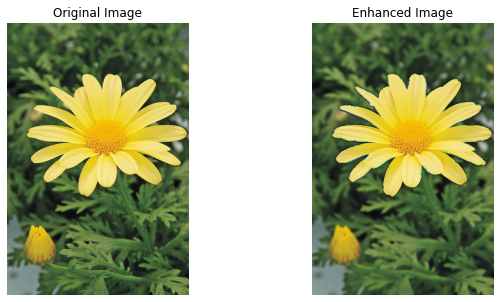

In [24]:
#(b)
kernel_size=9
sigma=3
blurred_back=cv.GaussianBlur(backImage,(kernel_size,kernel_size),sigma)
enhanced_img=output+blurred_back
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Enhanced Image')

<b>
b) Gaussian blur is applied on the seperated background to enchance the image in the above question.Then the foreground and the blurred background is combined to generate the final enchanced image. The results are shown above. The flower looks more focused in the blurred background but the edges of the flower seems less smooth compared to the orginal figure.
<br>
<br>
C) When we blur the background some black pixels got mixed as the area belongs to the flower was replaced by black pixels.